# 1. Dataset Preparation

Dibawah ini adalah Library yang kami gunakan

In [255]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import time
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.utils import shuffle


Membaca data

In [5]:
test_df = pd.read_csv ('emnist-letters-test.csv')
test_df

,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14794,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14795,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14796,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14797,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_df = pd.read_csv ('emnist-letters-train.csv')
train_df

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88794,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88795,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88796,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88797,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test_df = pd.read_csv('emnist-letters-test.csv', header=None)
test_df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14795,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14796,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14797,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14798,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
train_df = pd.read_csv('emnist-letters-train.csv', header=None)
train_df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88795,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88796,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88797,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88798,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Menggabungkan test_df dan train_df menjadi satu dataframe dan mengambil 100 sample untuk setiap kela A-Z

In [34]:
df_merge = pd.concat([test_df, train_df])

samples_per_class = 100

df_balance = pd.concat([
    df_merge[df_merge[0] == class_id].sample(samples_per_class, random_state=42)
    for class_id in range(1, 27)
])

print(df_balance)

       0    1    2    3    4    5    6    7    8    9    ...  775  776  777  \
96       1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
42329    1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
584      1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
67600    1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
58146    1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
5583    26    0    0    0    0    0    0    0    0    0  ...    0    0    0   
33927   26    0    0    0    0    0    0    0    0    0  ...    0    0    0   
88423   26    0    0    0    0    0    0    0    0    0  ...    0    0    0   
16008   26    0    0    0    0    0    0    0    0    0  ...    0    0    0   
30594   26    0    0    0    0    0    0    0    0    0  ...    0    0    0   

       778  779  780  781  782  783  784  
96      

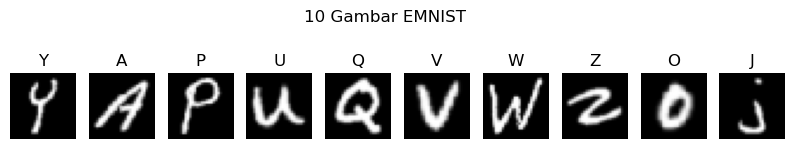

In [166]:
#ekstrak label dan gambar
labels = train_df.iloc[:, 0].values
images = train_df.iloc[:, 1:].values

selected_images = []
selected_labels = []

#pilih 100 sample dari setiap huruf
for class_label in range(1, 27):  # EMNIST Letters: 1=A, ..., 26=Z
    class_indices = np.where(labels == class_label)[0]
    selected_idx = np.random.choice(class_indices, 100, replace=False)
    selected_images.append(images[selected_idx])
    selected_labels.append(labels[selected_idx])

#menggabungkan semua sample
X = np.vstack(selected_images)
y = np.hstack(selected_labels)

#Memilih dan menampilkan 10 gambar secara random
random_indices = np.random.choice(len(X), size=10, replace=False)

plt.figure(figsize=(10, 2))
for i, idx in enumerate(random_indices):
    image = X[idx].reshape(28, 28).T  # Transpose untuk orientasi benar
    label = chr(y[idx] + 64)  # Label: 1 -> A, 2 -> B, dst
    plt.subplot(1, 10, i + 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(label)

plt.suptitle("10 Gambar EMNIST")
plt.show()

In [170]:
df_balance = df_balance.sample(frac=1, random_state=42).reset_index(drop=True)
df_balance

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2596,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2597,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2598,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
#suffle dan LOOCV menjadi 80% dan 20%
X = df_balance.iloc[:, 1:].values #fitur pada gambar
y = df_balance.iloc[:, 0].values #label pada setiap kelas A-Z
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [177]:
print("X_train di uji:", X_train.shape)
print("X_train di test :", X_test.shape)

X_train di uji: (2080, 784)
X_train di test : (520, 784)


Jadi hasil dari split data 80% dan 20 % itu 
X_train diuji = 2080
X_train ditest = 520

# 2. Feature Extraction

In [264]:
#Parameter
hog_orientations = 9 #SUDUT
hog_pixels_per_cell = (6, 6) #SEL HOG
hog_cells_per_block = (2, 2) #BLOK

#Fitur mengekstrak fitur HOG
def extract_hog_features(images):
    hog_features = []
    for img in images:
        img_reshaped = img.reshape((28, 28)).T  # Transpose agar orientasi benar
        features = hog(img_reshaped,
                       orientations=hog_orientations,
                       pixels_per_cell=hog_pixels_per_cell,
                       cells_per_block=hog_cells_per_block,
                       block_norm='L2-Hys')
        hog_features.append(features)
    return np.array(hog_features)

#Menerapkan fungsi HOG
X_train_hog = extract_hog_features(X_train)
X_test_hog = extract_hog_features(X_test)

#Menampilkan ukuran Aray
print("Ukuran fitur HOG (train):", X_train_hog.shape)
print("Ukuran fitur HOG (test):", X_test_hog.shape)

Ukuran fitur HOG (train): (2080, 324)
Ukuran fitur HOG (test): (520, 324)


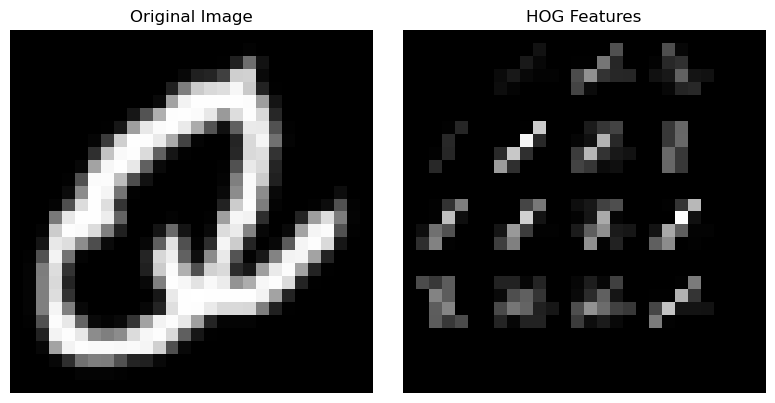

In [257]:
# Ambil satu gambar dari X_train
image = X_train[14].reshape((28, 28))

# Ekstrak dan tampilkan citra HOG
fd, hog_image = hog(image,
                    orientations=9,
                    pixels_per_cell=(6, 6),
                    cells_per_block=(2, 2),
                    block_norm='L2-Hys',
                    transform_sqrt=True,
                    visualize=True)

# Plot gambar asli dan HOG
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap='gray')
plt.title("HOG Features")
plt.axis('off')

plt.tight_layout()
plt.show()

Program mengambil satu gambar dari dataset pada indeks ke-14 yaitu Q, lalu mengekstrak fitur HOG dari gambar tersebut.

# 3. Classification

In [179]:
#Konfigurasi parameter yang ingin diuji
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

In [65]:
# Inisialisasi model SVM
svm_model = SVC()

In [67]:
# GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=3, verbose=2, n_jobs=-1)

In [71]:
start_time = time.time()
grid_search.fit(X_train_hog, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [73]:
end_time = time.time()

In [77]:
print(f"\nWaktu pelatihan dengan Grid Search: {end_time - start_time:.2f} detik")
print("Parameter terbaik:", grid_search.best_params_)
print("Akurasi terbaik  :", grid_search.best_score_)


Waktu pelatihan dengan Grid Search: 275.65 detik
Parameter terbaik: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Akurasi terbaik  : 0.7947146779999805


In [107]:
y_pred = grid_search.predict(X_test_hog)

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))


=== Classification Report ===
              precision    recall  f1-score   support

           1       0.74      0.70      0.72        20
           2       0.65      0.65      0.65        20
           3       0.82      0.90      0.86        20
           4       0.88      0.70      0.78        20
           5       1.00      0.85      0.92        20
           6       0.80      0.80      0.80        20
           7       0.63      0.60      0.62        20
           8       0.74      0.85      0.79        20
           9       0.52      0.60      0.56        20
          10       0.79      0.75      0.77        20
          11       0.95      0.90      0.92        20
          12       0.65      0.55      0.59        20
          13       0.90      0.90      0.90        20
          14       0.84      0.80      0.82        20
          15       0.83      1.00      0.91        20
          16       0.84      0.80      0.82        20
          17       0.86      0.60      0.71       

# 4. Evaluation

In [270]:
print("=== Evaluation on set ===")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall   :", recall_score(y_test, y_pred, average='macro'))
print("F1-Score :", f1_score(y_test, y_pred, average='macro'))

=== Evaluation on set ===
Accuracy : 0.8173076923076923
Precision: 0.8236427064980705
Recall   : 0.8173076923076923
F1-Score : 0.816599217008355


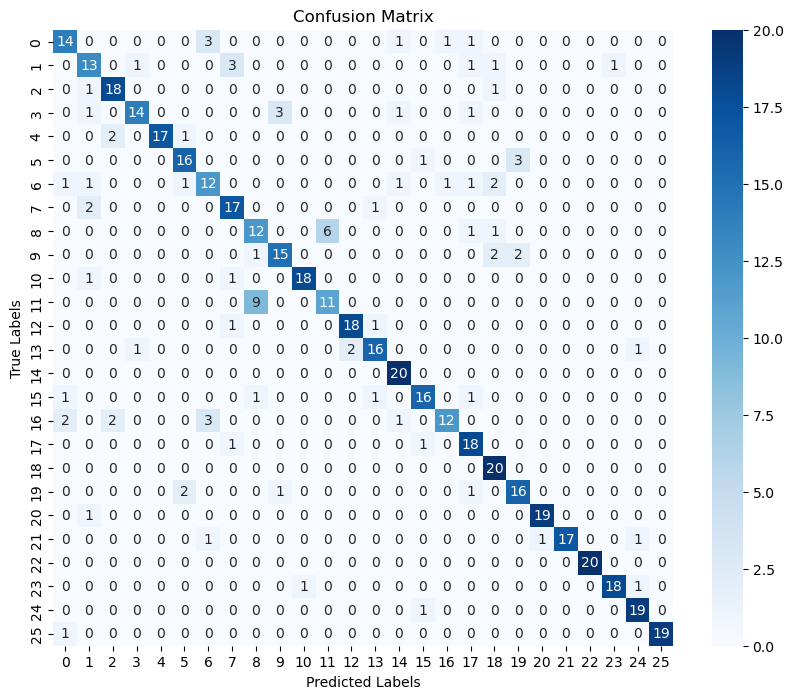

In [273]:
#Menampilkan Confusion Matrix dari hasil prediksi Model
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [275]:
print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_test_pred))


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           1       0.95      0.90      0.92        20
           2       0.95      1.00      0.98        20
           3       1.00      0.95      0.97        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       0.90      0.95      0.93        20
           8       1.00      0.95      0.97        20
           9       0.84      0.80      0.82        20
          10       1.00      0.95      0.97        20
          11       1.00      1.00      1.00        20
          12       0.85      0.85      0.85        20
          13       1.00      0.95      0.97        20
          14       0.95      1.00      0.98        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        20
          17       1.00      1.00      